In [2]:
import pandas as pd
import numpy as np

In [3]:
df_raw = pd.read_parquet('./heir_raw.parquet')
df_y_actual = pd.read_parquet('./actual.parquet')

In [28]:
selected_cols = [
 'MONTH',
 'lastrejectcredamount_222A',
 'numinstlsallpaid_934L',
 'numinstpaidearly_338L',
 'daysoverduetolerancedd_3976961L',
 'mobilephncnt_593L',
 'numcontrs3months_479L',
 'numrejects9m_859L',
 'sellerplacecnt_915L',
 'lastrejectcredamount_222A.1',
 'numinstlsallpaid_934L.1',
 'numinstpaidearly_338L.1',
 'lastapprcommoditytypec_5251766M',
 'lastcancelreason_561M',
 'lastrejectcommoditycat_161M',
 'lastrejectcommodtypec_5251769M',
 'lastrejectreason_759M',
 'lastrejectreasonclient_4145040M',
 'previouscontdistrict_112M']

In [30]:
df_raw = df_raw[selected_cols]

In [31]:
df_y_actual

,actual
0,0
1,0
2,0
3,1
4,1
...,...
67186,1
67187,0
67188,0
67189,1


In [32]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [33]:
neighbors = NearestNeighbors(n_neighbors=240)
neighbors_fit = neighbors.fit(df_raw)
distances, indices = neighbors_fit.kneighbors(df_raw)

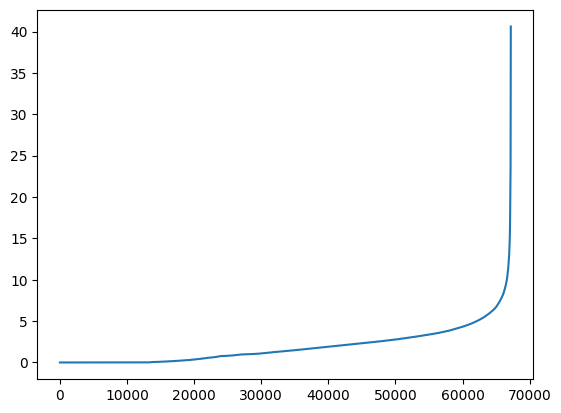

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

db = DBSCAN(eps=40, min_samples=240).fit(df_raw)

In [36]:
cluster_labels = db.labels_

In [37]:
cluster_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise points
n_clusters

2

In [39]:
y_labels = pd.DataFrame({'pred': cluster_labels})

In [40]:
df_results = pd.concat([y_labels, df_y_actual], axis=1, join="inner")

In [41]:
df_filtered = df_results[df_results['pred'] != -1]

In [42]:
df_filtered

,pred,actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
67186,1,1
67187,0,0
67188,1,0
67189,0,1


In [43]:
df_formatted = df_raw.reset_index(inplace=False).drop(columns=['case_id'], inplace=False)

In [44]:
predicted = df_filtered['pred']
actual = df_filtered['actual']

In [45]:
focused_raw = df_formatted.iloc[predicted.index]

In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculating accuracy
accuracy = accuracy_score(actual, predicted)

# Calculating precision
precision = precision_score(actual, predicted, average='weighted')

# Calculating recall
recall = recall_score(actual, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5076231576746756
Precision: 0.5088847235606598
Recall: 0.5076231576746756


In [47]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(focused_raw, predicted)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.35606511215851705


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(focused_raw)
numped_arry = predicted.to_numpy()

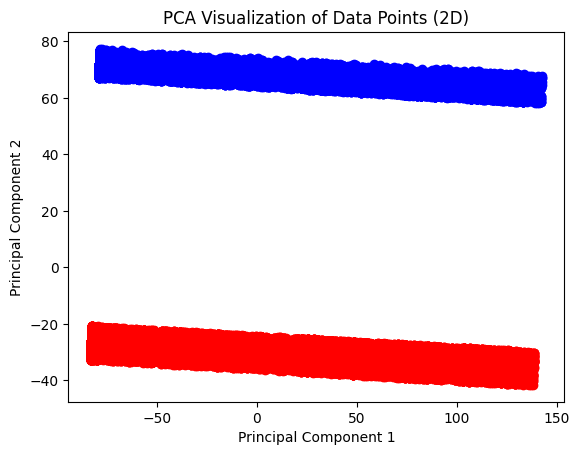

In [50]:
plt.scatter(reduced_data[numped_arry == 0, 0], reduced_data[numped_arry == 0, 1], color='red', label='Class 0')
plt.scatter(reduced_data[numped_arry == 1, 0], reduced_data[numped_arry == 1, 1], color='blue', label='Class 1')
plt.title('PCA Visualization of Data Points (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [51]:
from sklearn.metrics import rand_score, adjusted_rand_score

RI = rand_score(actual, predicted)
ARI = adjusted_rand_score(actual, predicted)

In [52]:
RI

0.5001087603259242

In [53]:
ARI

0.00021978779920838314